In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences
from scipy.ndimage import gaussian_filter1d

NPMTMAX = 6
NTIMEMAX = 50000
NSLOTMAX = 2000
MAXFADC = 4096

FADC_PER_PE =  1.9
SIGMA_PER_PE =  0.1
DYNODE_ANODE_RATIO = 32.

In [2]:
def load_pmt(input_file,pmtname, minnpe = 0.): 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4", "pmt1_FADC", "pmt2_FADC", "pmt3_FADC", "pmt4_FADC"]
    pmt_em = data.query("id == 1 or id == 2 or id == -2")[pmtname]
    pmt_mu = data.query("id == 3 or id == -3")[pmtname]

    pmt_mu = np.asarray(pmt_mu[pmt_mu >= minnpe])
    pmt_em = np.asarray(pmt_em[pmt_em >= minnpe])
    pmt_tot = np.concatenate((pmt_mu,pmt_em))
    
    return pmt_em, pmt_mu, pmt_tot

# Convert NPE to FADC 
def npe_to_fadc(npe_array):
    n_pe_tot = len(npe_array)
    sigma_per_pe_array = np.full(n_pe_tot, SIGMA_PER_PE)
    sigma = np.sqrt(sigma_per_pe_array * npe_array)
    hg_fadc = FADC_PER_PE * npe_array * sigma * np.random.normal(size=n_pe_tot)
    return hg_fadc


### 
PMTs 1, 2 and 3 are at the bottom of the tank 
### 
PMT 4 is in the middle of the top layer 

In [3]:
input_20 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_30cm_3'
input_40 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_35cm_3'
input_60 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_40cm_3'

min_npe = 10.

pmt1_em_20, pmt1_mu_20, pmt1_tot_20 = load_pmt(input_20,'pmt1',min_npe)
pmt4_em_20, pmt4_mu_20, pmt4_tot_20 = load_pmt(input_20,'pmt4',min_npe)

pmt1_em_40, pmt1_mu_40, pmt1_tot_40 = load_pmt(input_40,'pmt1',min_npe)
pmt4_em_40, pmt4_mu_40, pmt4_tot_40 = load_pmt(input_40,'pmt4',min_npe)

pmt1_em_60, pmt1_mu_60, pmt1_tot_60 = load_pmt(input_60,'pmt1',min_npe)
pmt4_em_60, pmt4_mu_60, pmt4_tot_60 = load_pmt(input_60,'pmt4',min_npe)

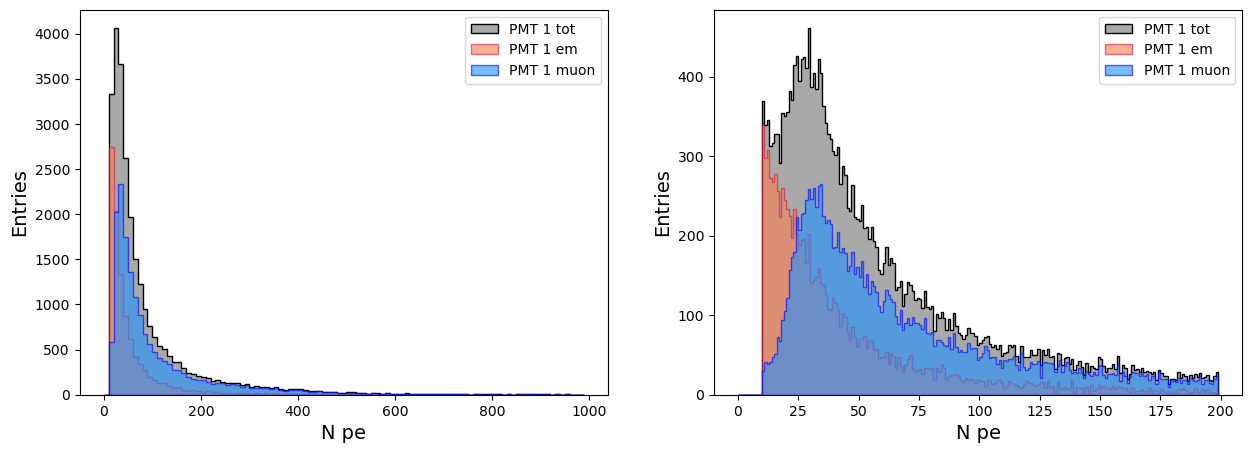

In [4]:
npe_bins = np.arange(0,1000,10)
npe_bins_lim = np.arange(0,200,1)

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt1_tot_20, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_20, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_20, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt1_tot_20, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_20, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_20, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top20cm.pdf')


Text(0, 0.5, 'Entries')

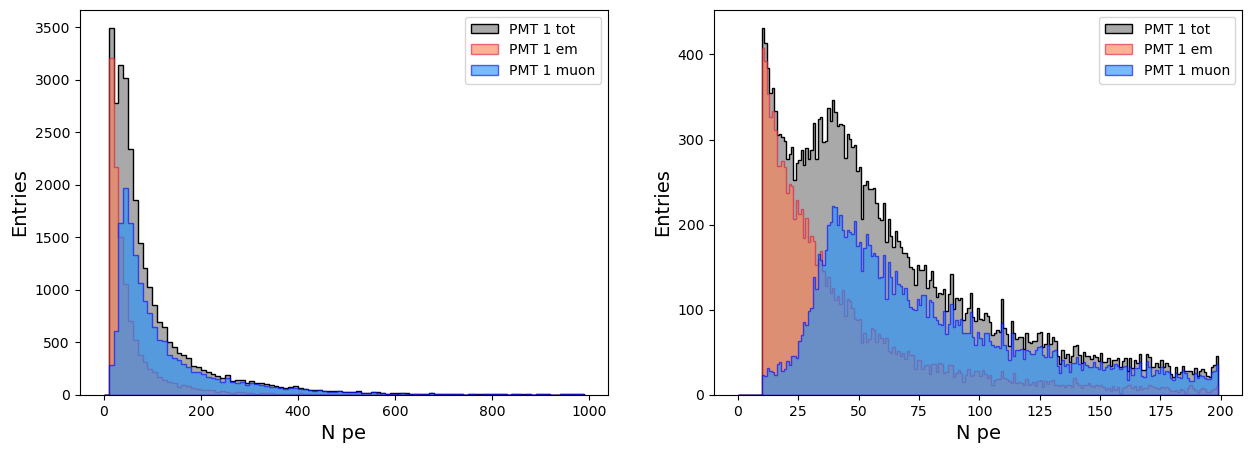

In [5]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt1_tot_40, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_40, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_40, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt1_tot_40, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_40, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_40, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

#plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top40cm.pdf')


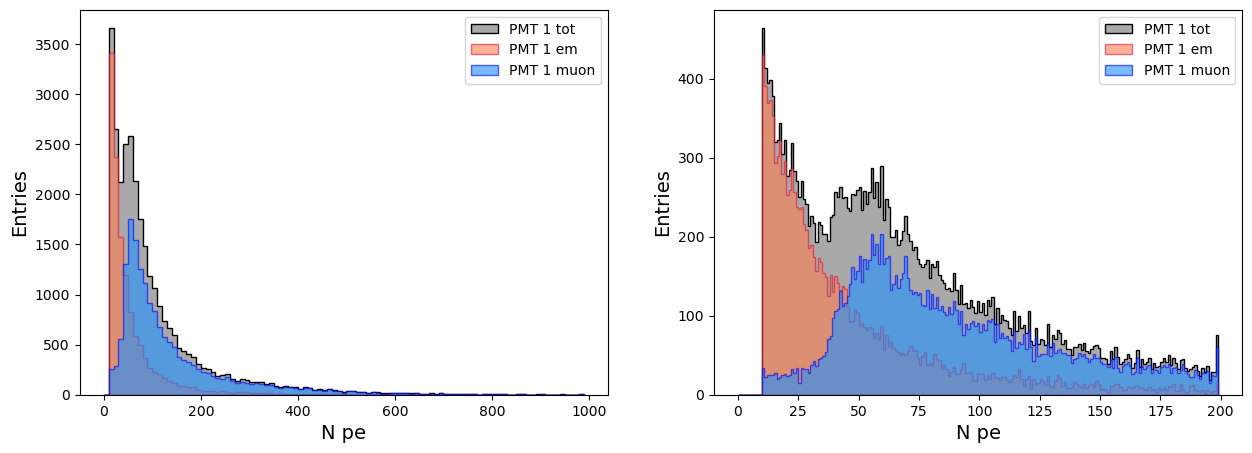

In [6]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt1_tot_60, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_60, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_60, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt1_tot_60, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_60, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_60, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top60cm.pdf')

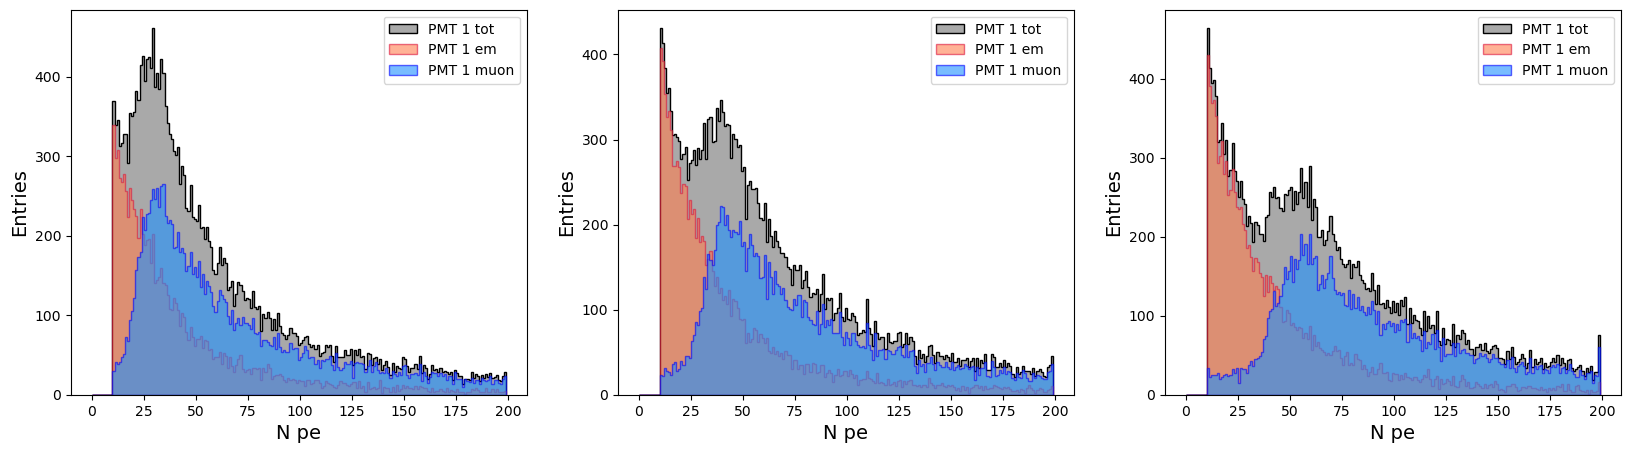

In [7]:
plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(pmt1_tot_20, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_20, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_20, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,2)
plt.hist(pmt1_tot_40, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_40, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_40, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,3)
plt.hist(pmt1_tot_60, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_60, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_60, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top_all.pdf')

In [8]:
min_npe = 10.

pmt1_em_20_fadc, pmt1_mu_20_fadc, pmt1_tot_20_fadc = load_pmt(input_20,'pmt1_FADC',min_npe)
pmt4_em_20_fadc, pmt4_mu_20_fadc, pmt4_tot_20_fadc = load_pmt(input_20,'pmt4_FADC',min_npe)

pmt1_em_40_fadc, pmt1_mu_40_fadc, pmt1_tot_40_fadc = load_pmt(input_40,'pmt1_FADC',min_npe)
pmt2_em_40_fadc, pmt2_mu_40_fadc, pmt2_tot_40_fadc = load_pmt(input_40,'pmt2_FADC',min_npe)
pmt3_em_40_fadc, pmt3_mu_40_fadc, pmt3_tot_40_fadc = load_pmt(input_40,'pmt3_FADC',min_npe)
pmt4_em_40_fadc, pmt4_mu_40_fadc, pmt4_tot_40_fadc = load_pmt(input_40,'pmt4_FADC',min_npe)

pmt1_em_60_fadc, pmt1_mu_60_fadc, pmt1_tot_60_fadc = load_pmt(input_60,'pmt1_FADC',min_npe)
pmt4_em_60_fadc, pmt4_mu_60_fadc, pmt4_tot_60_fadc = load_pmt(input_60,'pmt4_FADC',min_npe)

In [9]:
pmt_top_tot_40_fadc =  np.concatenate((pmt1_tot_40_fadc,pmt2_tot_40_fadc,pmt3_tot_40_fadc))
pmt_top_mu_40_fadc =  np.concatenate((pmt1_mu_40_fadc,pmt2_mu_40_fadc,pmt3_mu_40_fadc))
pmt_top_em_40_fadc =  np.concatenate((pmt1_em_40_fadc,pmt2_em_40_fadc,pmt3_em_40_fadc))

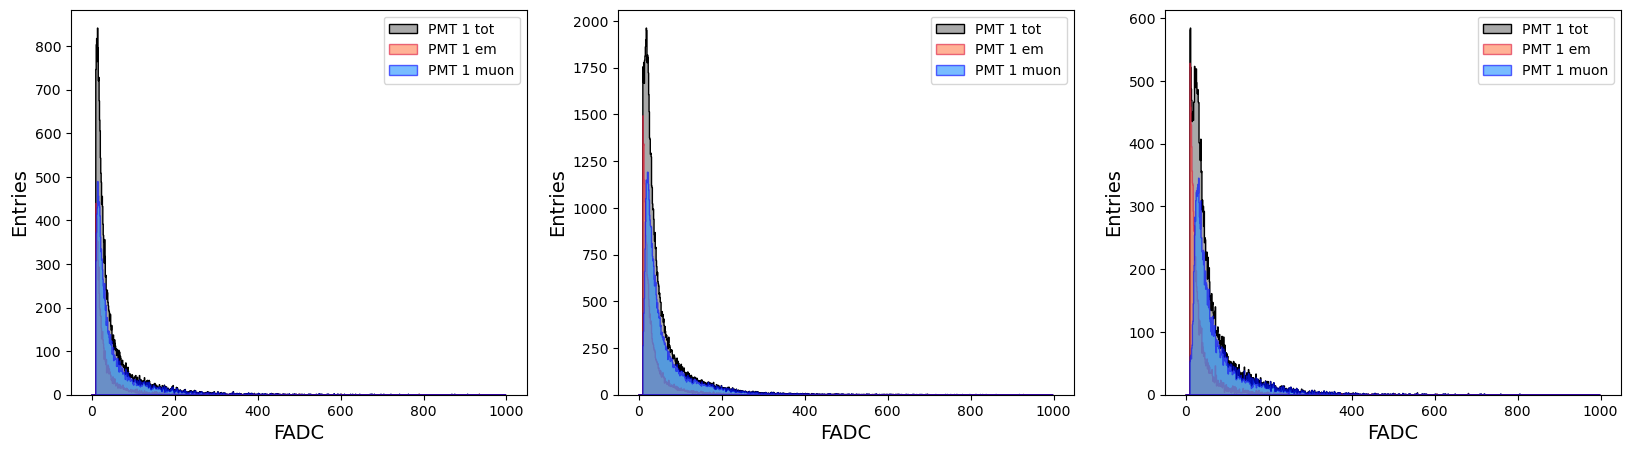

In [10]:
plt.subplots(1,3,figsize=(20,5))

min_npe = 20.

fadc_bins = np.arange(0,1000,1)

plt.subplot(1,3,1)
plt.hist(pmt1_tot_20_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_20_fadc, bins=fadc_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_20_fadc, bins=fadc_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,2)
plt.hist(pmt_top_tot_40_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt_top_em_40_fadc, bins=fadc_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt_top_mu_40_fadc, bins=fadc_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,3)
plt.hist(pmt1_tot_60_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em_60_fadc, bins=fadc_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu_60_fadc, bins=fadc_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top_all_FADC.pdf')

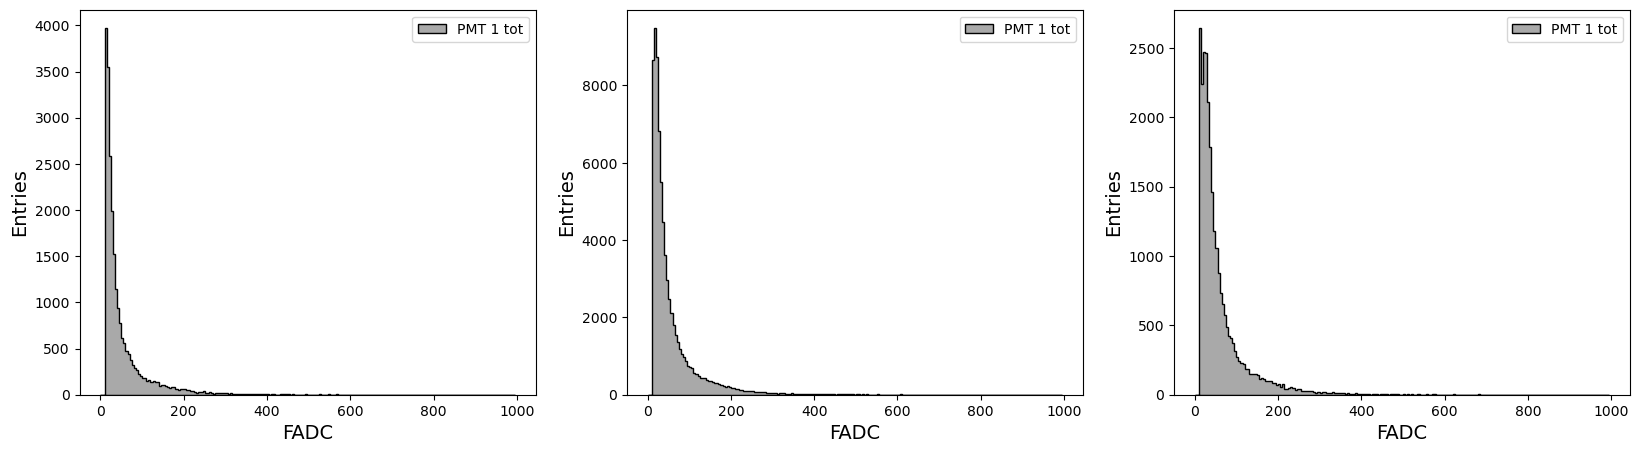

In [11]:
plt.subplots(1,3,figsize=(20,5))

min_npe = 20.

fadc_bins = np.arange(0,1000,5)

plt.subplot(1,3,1)
plt.hist(pmt1_tot_20_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,2)
plt.hist(pmt_top_tot_40_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,3)
plt.hist(pmt1_tot_60_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.legend()
plt.yscale('linear')
plt.xlabel('FADC',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT1_top_tot_FADC.pdf')

In [12]:
# Fit a Gaussian to the muon peak to identify its position 
fadc_bins = np.arange(0,1000,1)

# Gaussian function for fitting
def gaussian(x, A, mu, sigma):
    return A * norm.pdf(x, mu, sigma)

# Define fit range 
entries, bin = np.histogram(pmt1_tot_40_fadc[pmt1_tot_40_fadc > 50], bins=fadc_bins)

arg_fadc_muon_mx = np.argmax(entries)
print('FADC bin with largest entries ',fadc_bins[arg_fadc_muon_mx])

fadc_low = fadc_bins[arg_fadc_muon_mx] - 40
fadc_hi = fadc_bins[arg_fadc_muon_mx] + 40

# Perform fit on histogram with restricted range 
pmt_top_tot_40_fadc_fit = pmt1_tot_40_fadc[(pmt1_tot_40_fadc > fadc_low) & (pmt1_tot_40_fadc < fadc_hi)]

entries, bin = np.histogram(pmt_top_tot_40_fadc_fit, bins=fadc_bins)

bin_centers = (bin[:-1] + bin[1:]) / 2
bin_width = bin[1] - bin[0]

p0 = [max(pmt_top_tot_40_fadc_fit), np.mean(pmt_top_tot_40_fadc_fit), np.std(pmt_top_tot_40_fadc_fit)]

popt, pcov = curve_fit(gaussian, bin_centers, entries, p0=p0)

# Extract parameter estimates
A_fit, mu_fit, sigma_fit = popt

# Compute standard errors (uncertainties)
perr = np.sqrt(np.diag(pcov))
A_err, mu_err, sigma_err = perr

# Compute fitted curve
x_fit = np.linspace(fadc_low, fadc_hi, 1000)
y_fit = gaussian(x_fit, *popt)

print('Result of Gaussian fit')
print('mu =',mu_fit)
print('sigma =',sigma_fit)


FADC bin with largest entries  51
Result of Gaussian fit
mu = 25.381708097438867
sigma = 12.166898490868569


/var/folders/9q/jx2z7jn52_75x5sl690z4ssm0000gn/T/ipykernel_83525/2968248576.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'k', linewidth=2, label=f'Fit: μ={mu_fit:.2f}, σ={sigma_fit:.2f}',color='red')


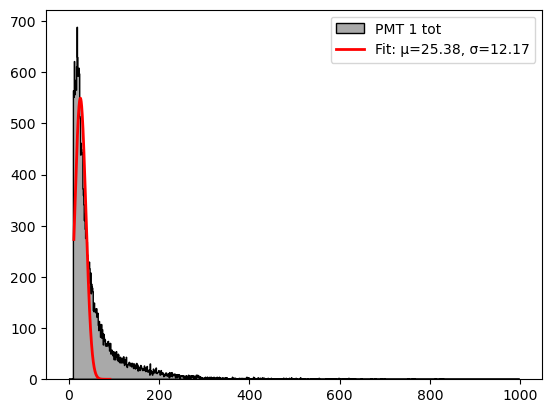

In [13]:
# Plot fitted Gaussian over entire x range
#x = np.linspace(fadc_low, fadc_hi, 1000)
#pdf = norm.pdf(x, mu, std)
#scaled_pdf = (fadc_bins[1] - fadc_bins[0]) * len(pmt_top_tot_60_fadc_fit) * pdf

plt.hist(pmt1_tot_40_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.plot(x_fit, y_fit, 'k', linewidth=2, label=f'Fit: μ={mu_fit:.2f}, σ={sigma_fit:.2f}',color='red')
plt.legend()

74
1


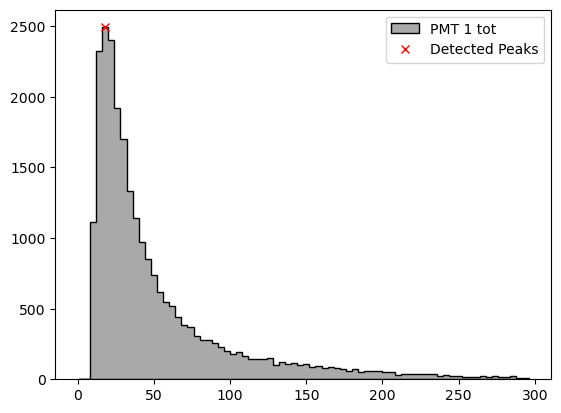

In [14]:
# Try peak finder from scipy,signal 
fadc_bins = np.arange(0,300,4)

entries, bin = np.histogram(pmt1_tot_40_fadc, bins=fadc_bins)
bin_centers = (bin[:-1] + bin[1:]) / 2

peaks, peaks_dict = find_peaks(entries, height = 100, distance = 10, prominence = 20)
print(len(entries))
print(len(peaks))
peaks

plt.hist(pmt1_tot_40_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.plot(bin_centers[peaks], entries[peaks], 'rx', label='Detected Peaks')

plt.legend()

In [15]:
peaks_dict

{'peak_heights': array([2493.]),
 'prominences': array([2482.]),
 'left_bases': array([1]),
 'right_bases': array([73])}

In [16]:
left_bases_values = entries[peaks_dict['left_bases']]
print(left_bases_values)
print('Hump to peak ratio: ',peaks_dict['peak_heights'][1]/entries[peaks_dict['left_bases']][1])

[0]


IndexError: index 1 is out of bounds for axis 0 with size 1

69.0
Max and min: 337 254
Hump to peak ratio:  1.3267716535433072


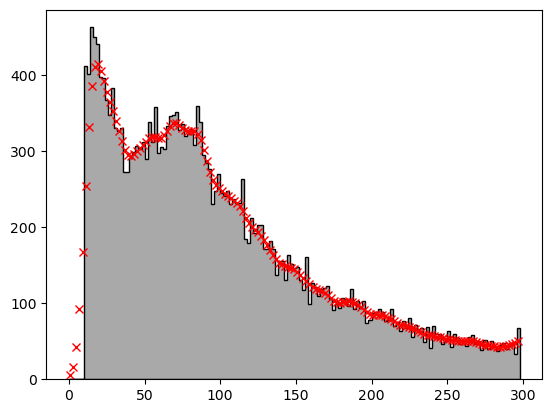

In [ ]:
# Another method, smooth the histogram 
fadc_bins = np.arange(0,300,2)

entries, bin = np.histogram(pmt1_tot_40_fadc, bins=fadc_bins)
bin_centers = (bin[:-1] + bin[1:]) / 2

smoothed_counts = gaussian_filter1d(entries, sigma=2)

plt.hist(pmt1_tot_40_fadc, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.plot(bin_centers,smoothed_counts,'rx', label='Smoothed counts')

bin_findmax = bin_centers[bin_centers > 50]
smoothed_counts_max = smoothed_counts[bin_centers > 50]
count_max = np.max(smoothed_counts_max)
count_max_arg = np.argmax(smoothed_counts_max)
print( bin_findmax[count_max_arg])

smoothed_counts_min = smoothed_counts[(bin_centers > 10) & (bin_centers < bin_findmax[count_max_arg])]
count_min = np.min(smoothed_counts_min)
print('Max and min:',count_max, count_min)
print('Hump to peak ratio: ',count_max/count_min)


In [ ]:
smoothed_counts

array([  5,  16,  42,  93, 168, 254, 332, 386, 411, 415, 406, 392, 378,
       365, 353, 340, 326, 313, 302, 295, 294, 296, 300, 304, 308, 312,
       317, 319, 319, 318, 318, 321, 327, 333, 337, 337, 335, 331, 328,
       327, 326, 326, 323, 315, 302, 287, 273, 262, 255, 251, 248, 244,
       241, 238, 235, 232, 228, 221, 212, 205, 200, 197, 194, 189, 183,
       177, 170, 164, 158, 153, 151, 149, 148, 147, 145, 141, 137, 133,
       129, 125, 122, 119, 118, 116, 114, 111, 107, 103, 101, 100, 101,
       102, 103, 102, 100,  98,  95,  91,  88,  86,  85,  86,  85,  84,
        83,  81,  79,  76,  74,  72,  71,  70,  69,  67,  66,  64,  62,
        60,  58,  58,  57,  56,  55,  54,  53,  53,  52,  52,  51,  51,
        50,  50,  51,  50,  49,  48,  46,  45,  45,  44,  44,  43,  43,
        44,  44,  45,  47,  48,  50])